# **`SIMPLE LINEAR REGRESSION`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read from the dataset
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

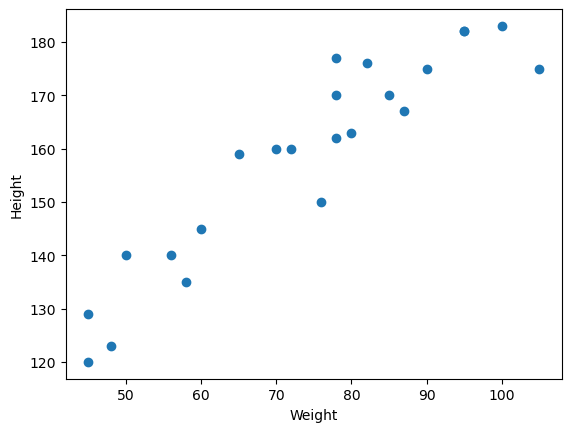

In [5]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [24]:
## divide our dataset into independent and depenedent features
X = df[["Weight"]] #independent feature
y = df["Height"] #dependent feature

In [25]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state= 42)

In [26]:
X.shape

(23, 1)

In [27]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [28]:
# Standardization of features of Train data (independent data)
from sklearn.preprocessing import StandardScaler


In [29]:
scaler = StandardScaler()

In [31]:
#applying Z score on all data of X
X_train = scaler.fit_transform(X_train)

In [32]:
#only transform the test data do not fit it as it has already been fit
X_test = scaler.transform(X_test)

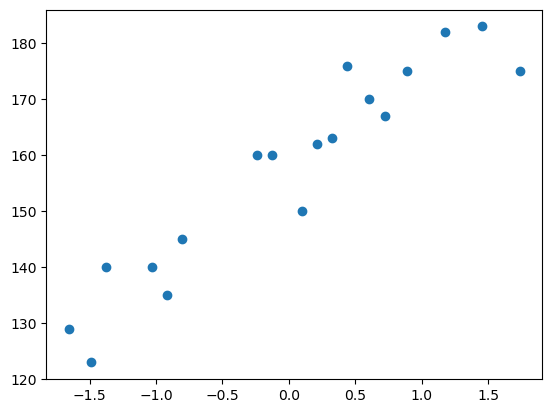

In [33]:
plt.scatter(X_train,y_train)

In [34]:
#Train the model - Simple linear regression
from sklearn.linear_model import LinearRegression

In [35]:
regressor = LinearRegression()

In [36]:
regressor.fit(X_train , y_train)

LinearRegression()

In [39]:
print( " The slope or coeffecient of weigth is", regressor.coef_)
print("Intercept", regressor.intercept_)

 The slope or coeffecient of weigth is [17.03440872]
Intercept 157.5


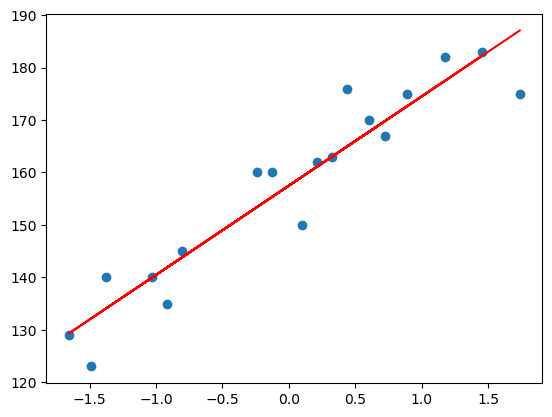

In [42]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train) , "r")

### prediction of train data
1. predicted height output = intercept  + coef_(Weights)
2. y_pred_train = 157.5 + 17.03440872(X_train)

### prediction of test data
1. predicted height output = intercept  + coef_(Weights)
2. y_pred_test = 157.5 + 17.03440872(X_test)

In [43]:
y_pred_test = regressor.predict(X_test)

In [44]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

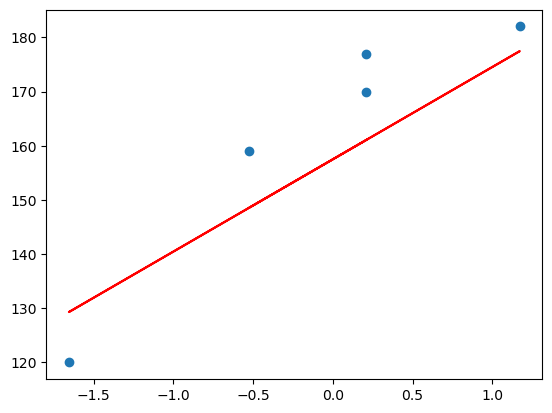

In [45]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regressor.predict(X_test) , "r")

## Performance matrix

## MSE , MAE , RMSE

## R squared and Adjusted R squared

In [46]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [47]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R squared
Fromula

**R^2 = 1 - SSR/SST**

R^2 = Coeffeceint of determination
SSR = Sum of squares of residuals
SST = Total sum of squares

In [48]:
from sklearn.metrics import r2_score
score = r2_score ( y_test , y_pred_test)
print(score)

0.776986986042344


## Adjusted R squared
Fromula

**Adjusted R^2 = 1 - [(1- R^2)*(n-1)/(n-k-1)]**

R^2 = Adjusted R^2 of the model
n = number of observations
k  = number of predictor variables

In [51]:
# Display Adjusted R - squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [52]:
regressor

LinearRegression()

In [53]:
## NEw data point weight = 80

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\tejas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [55]:
print("The height prediciton for weight 80kg is",regressor.predict(scaled_weight))

The height prediciton for weight 80kg is [163.01076266]


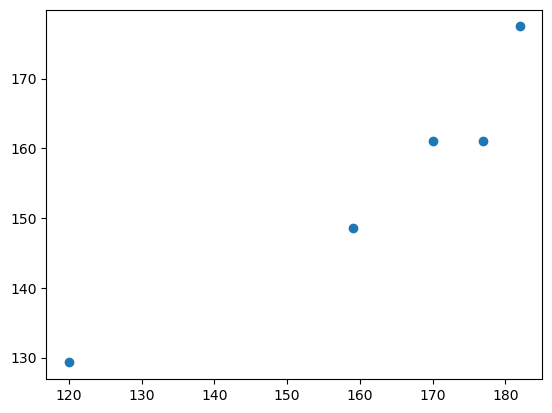

In [56]:
## Assumptions
## Plot a scatterplot for predictions
plt.scatter(y_test,y_pred_test)

In [57]:
## Residuals
residual = y_test - y_pred_test
residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

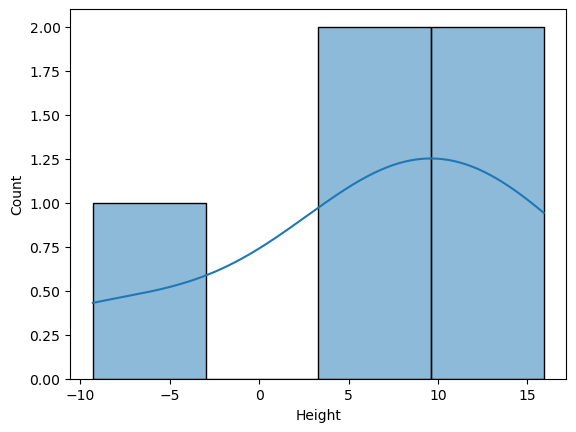

In [65]:
## Plot residuals
import seaborn as sns
sns.histplot(residual,kde=True)

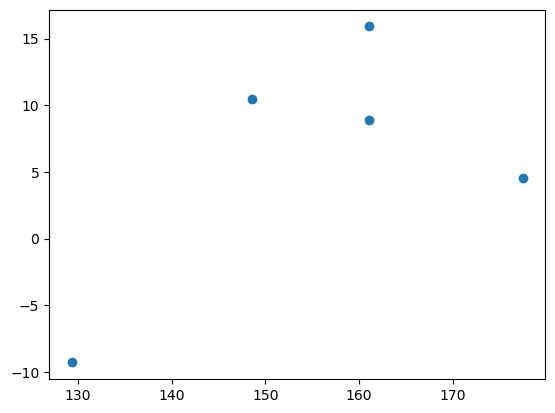

In [64]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residual)